<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da08_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gapminder.tsv](https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/gapminder.tsv) 파일 데이터 분석

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


*   파일을 읽고 DataFrame 생성
*   국가 수
*   대륙 수
*   연도 수
*   기대수명 분석
    *   기대수명 최댓값, 최솟값 행
*   1인당 GDP 분석
    *   1인당 GDP 최댓값, 최솟값 행
*   인구수 분석
*   그룹별 통계량


In [2]:
file_path = 'https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/gapminder.tsv'

In [3]:
df = pd.read_csv(file_path, sep='\t')

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# 기술 통계량

In [7]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# 국가 수

In [8]:
df.country.value_counts()

,count
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [9]:
countries = df.country.unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [10]:
countries.size

142

# 대륙 수

In [11]:
df.continent.value_counts()

,count
continent,
Africa,624
Asia,396
Europe,360
Americas,300
Oceania,24


In [12]:
continents = df.continent.unique()
continents

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [13]:
continents.size

5

# 연도

In [14]:
years = df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [15]:
years.size

12

# 기대수명(lifeExp) 분석

In [16]:
df.lifeExp.describe()

,lifeExp
count,1704.000000
mean,59.474439
std,12.917107
min,23.599000
25%,48.198000
50%,60.712500
75%,70.845500
max,82.603000


In [17]:
df.lifeExp.max()  # 기대수명 최댓값

82.603

In [18]:
df[df.lifeExp == df.lifeExp.max()]  # 기대수명이 최댓값인 행

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.06806


In [19]:
df.lifeExp.min()  # 기대수명 최솟값

23.599

In [20]:
df[df.lifeExp == df.lifeExp.min()]  # 기대수명이 최솟값인 행

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


## 일본 기대수명

In [21]:
japan_df = df[df.country == 'Japan']
japan_df

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


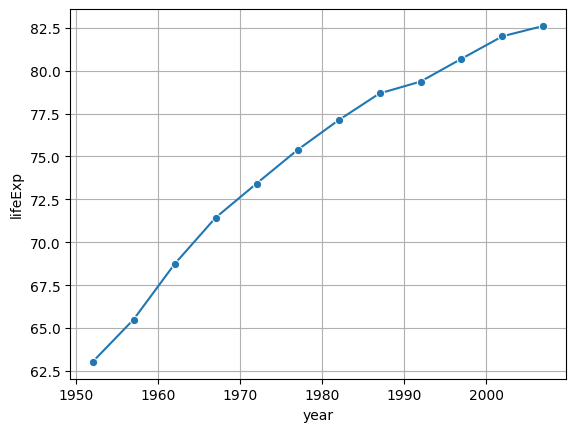

In [22]:
sns.lineplot(data=japan_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()

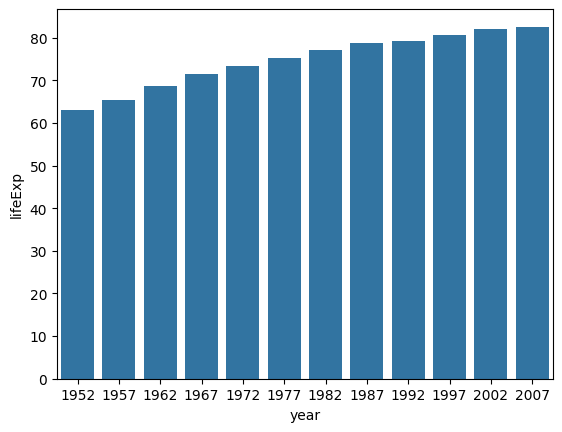

In [23]:
sns.barplot(data=japan_df, x='year', y='lifeExp', errorbar=None)
plt.show()

## 르완다 기대수명

In [24]:
rwanda_df = df[df.country == 'Rwanda']
rwanda_df

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


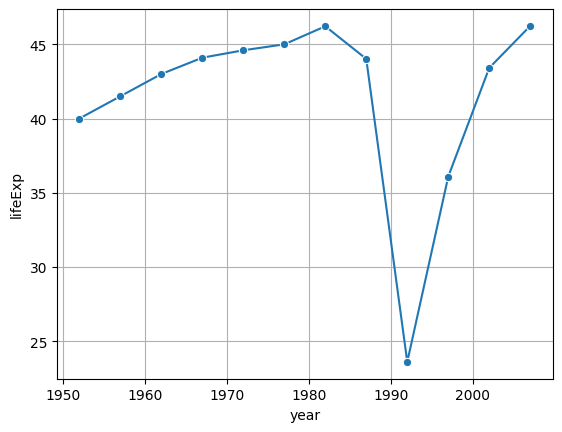

In [25]:
sns.lineplot(data=rwanda_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()

## 연도별 기대수명 평균값

In [26]:
df.groupby(by=['year']).lifeExp.mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


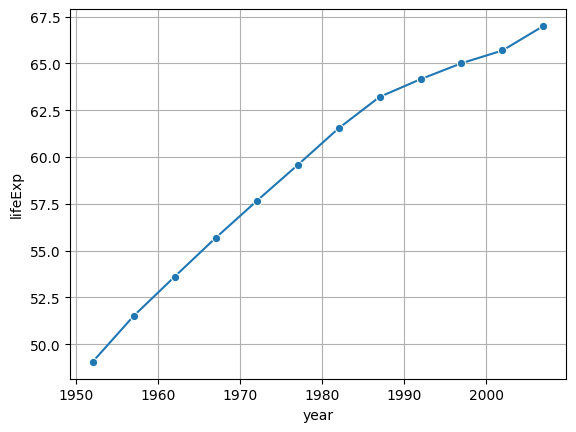

In [27]:
sns.lineplot(data=df, x='year', y='lifeExp', estimator='mean', marker='o', errorbar=None)
plt.grid()
plt.show()

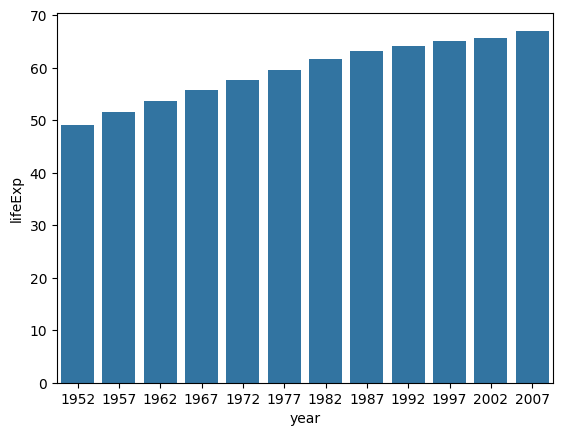

In [28]:
sns.barplot(data=df, x='year', y='lifeExp', estimator='mean', errorbar=None)
plt.show()

## 대륙별 연도별 기대수명

대륙별 기대수명 평균의 연도에 따른 변화

In [29]:
df.groupby(by=['continent', 'year']).lifeExp.mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.020515
           2002    69.233879
           2007    70.728485
Europe     1952    64.408500
           1957    66.703067
           1962    68.539233
           1967    69.737600
           1972    70.775033
           1977    71.937767
           1982    72.806400
           1987    73.642167
           1992    74.440100
           1997    75.505167
           2002    76.700600
           2007    77.648600
Oceania    1952    69.255000
           1957    70.295000
           1962    71.085000
           1967    71.310000
           1972    71.910000
           1977    72.855000
           1982    74.290000
           1987    75.320000
           1992    76.945000
           1997    78.190000
           2002    79.740000
           2007    80.719500
Name: lifeExp, dtype: float64

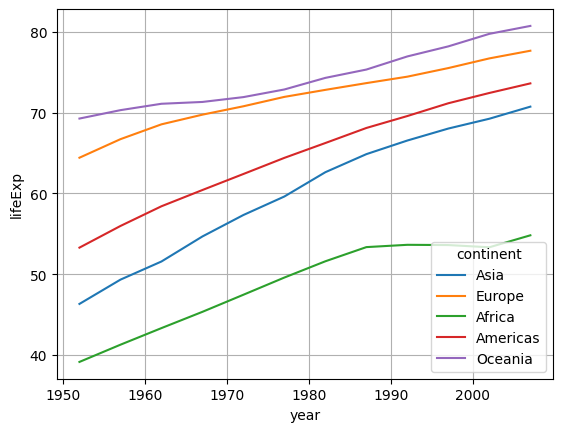

In [30]:
sns.lineplot(data=df, x='year', y='lifeExp', hue='continent', errorbar=None)
#> estimator='mean' 생략 가능
plt.grid()
plt.show()

# 1인당 GDP(gdpPercap) 분석

In [33]:
df.gdpPercap.max()  # 1인당 GDP 최댓값

113523.1329

In [34]:
df[df.gdpPercap == df.gdpPercap.max()]  # 1인당 GDP가 최대인 행

,country,continent,year,lifeExp,pop,gdpPercap
853,Kuwait,Asia,1957,58.033,212846,113523.1329


In [35]:
df.gdpPercap.min()  # 1인당 GDP 최솟값

241.1658765

In [36]:
df[df.gdpPercap == df.gdpPercap.min()]  # 1인당 GDP가 최소인 행

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165876


## 쿠웨이트의 1인당 GDP 변화

In [37]:
kuwait_df = df[df.country == 'Kuwait']
kuwait_df

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700
857,Kuwait,Asia,1977,69.343,1140357,59265.47714
858,Kuwait,Asia,1982,71.309,1497494,31354.03573
859,Kuwait,Asia,1987,74.174,1891487,28118.42998
860,Kuwait,Asia,1992,75.190,1418095,34932.91959
861,Kuwait,Asia,1997,76.156,1765345,40300.61996


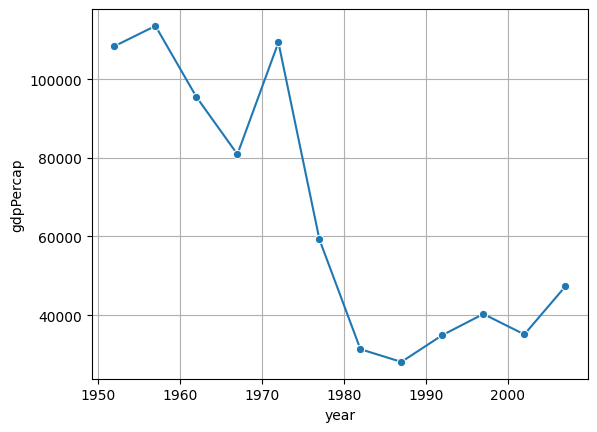

In [39]:
sns.lineplot(data=kuwait_df, x='year', y='gdpPercap', marker='o')
plt.grid()
plt.show()

## 콩고의 1인당 GDP 변화

In [40]:
congo_df = df[df.country == 'Congo, Dem. Rep.']
congo_df

,country,continent,year,lifeExp,pop,gdpPercap
324,"Congo, Dem. Rep.",Africa,1952,39.143,14100005,780.542326
325,"Congo, Dem. Rep.",Africa,1957,40.652,15577932,905.860230
326,"Congo, Dem. Rep.",Africa,1962,42.122,17486434,896.314634
327,"Congo, Dem. Rep.",Africa,1967,44.056,19941073,861.593242
328,"Congo, Dem. Rep.",Africa,1972,45.989,23007669,904.896068
329,"Congo, Dem. Rep.",Africa,1977,47.804,26480870,795.757282
330,"Congo, Dem. Rep.",Africa,1982,47.784,30646495,673.747818
331,"Congo, Dem. Rep.",Africa,1987,47.412,35481645,672.774812
332,"Congo, Dem. Rep.",Africa,1992,45.548,41672143,457.719181
333,"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.188423


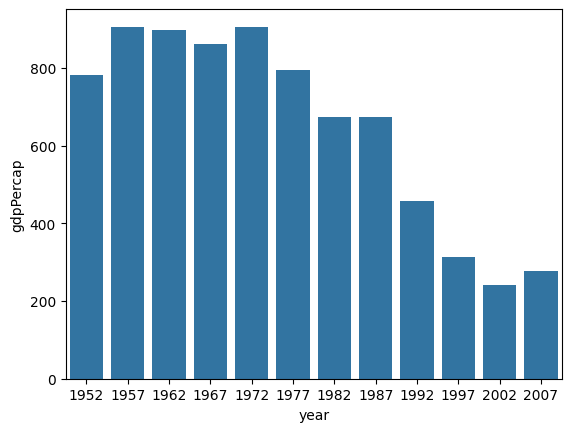

In [41]:
sns.barplot(data=congo_df, x='year', y='gdpPercap')
plt.show()

## 대륙별 1인당 GDP 평균의 연도별 변화

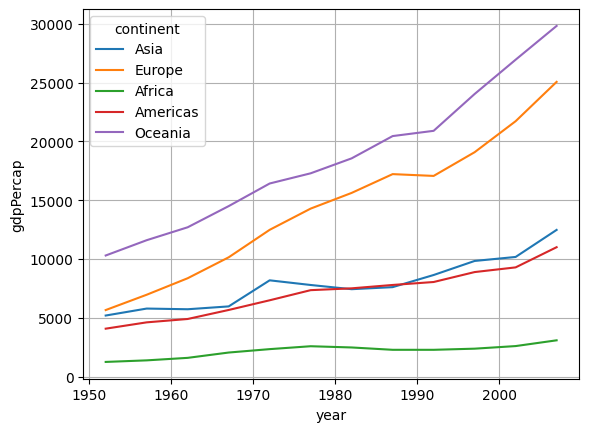

In [43]:
sns.lineplot(data=df, x='year', y='gdpPercap', hue='continent', errorbar=None)
plt.grid()
plt.show()

In [44]:
df.groupby(by=['continent', 'year']).gdpPercap.mean()

continent  year
Africa     1952     1252.572466
           1957     1385.236062
           1962     1598.078825
           1967     2050.363801
           1972     2339.615674
           1977     2585.938508
           1982     2481.592960
           1987     2282.668991
           1992     2281.810333
           1997     2378.759555
           2002     2599.385159
           2007     3089.032605
Americas   1952     4079.062552
           1957     4616.043733
           1962     4901.541870
           1967     5668.253496
           1972     6491.334139
           1977     7352.007126
           1982     7506.737088
           1987     7793.400261
           1992     8044.934406
           1997     8889.300863
           2002     9287.677107
           2007    11003.031625
Asia       1952     5195.484004
           1957     5787.732940
           1962     5729.369625
           1967     5971.173374
           1972     8187.468699
           1977     7791.314020
           1982     7434.135157
           1987     7608.226508
           1992     8639.690248
           1997     9834.093295
           2002    10174.090397
           2007    12473.026870
Europe     1952     5661.057435
           1957     6963.012816
           1962     8365.486814
           1967    10143.823757
           1972    12479.575246
           1977    14283.979110
           1982    15617.896551
           1987    17214.310727
           1992    17061.568084
           1997    19076.781802
           2002    21711.732422
           2007    25054.481636
Oceania    1952    10298.085650
           1957    11598.522455
           1962    12696.452430
           1967    14495.021790
           1972    16417.333380
           1977    17283.957605
           1982    18554.709840
           1987    20448.040160
           1992    20894.045885
           1997    24024.175170
           2002    26938.778040
           2007    29810.188275
Name: gdpPercap, dtype: float64

## 2007년 1인당 GDP 상위 10개 국가

In [50]:
gdp_top10 = df[df.year == 2007].sort_values(by='gdpPercap', ascending=False).head(n=10)
gdp_top10

,country,continent,year,lifeExp,pop,gdpPercap
1151,Norway,Europe,2007,80.196,4627926,49357.19017
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1367,Singapore,Asia,2007,79.972,4553009,47143.17964
1619,United States,Americas,2007,78.242,301139947,42951.65309
755,Ireland,Europe,2007,78.885,4109086,40675.99635
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907
1091,Netherlands,Europe,2007,79.762,16570613,36797.93332
251,Canada,Americas,2007,80.653,33390141,36319.23501
695,Iceland,Europe,2007,81.757,301931,36180.78919


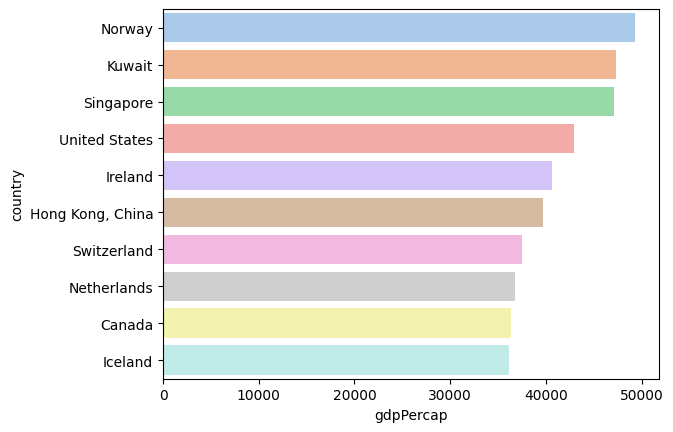

In [53]:
sns.barplot(data=gdp_top10, x='gdpPercap', y='country', hue='country', palette='pastel')
plt.show()

## 2007년 1인당 GDP 하위 10개 국가

In [54]:
gdp_bottom10 = df[df.year == 2007].sort_values(by='gdpPercap').head(n=10)
gdp_bottom10

,country,continent,year,lifeExp,pop,gdpPercap
335,"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.551859
899,Liberia,Africa,2007,45.678,3193942,414.507341
215,Burundi,Africa,2007,49.580,8390505,430.070692
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298
635,Guinea-Bissau,Africa,2007,46.388,1472041,579.231743
1127,Niger,Africa,2007,56.867,12894865,619.676892
503,Eritrea,Africa,2007,58.040,4906585,641.369524
515,Ethiopia,Africa,2007,52.947,76511887,690.805576
263,Central African Republic,Africa,2007,44.741,4369038,706.016537
563,Gambia,Africa,2007,59.448,1688359,752.749726


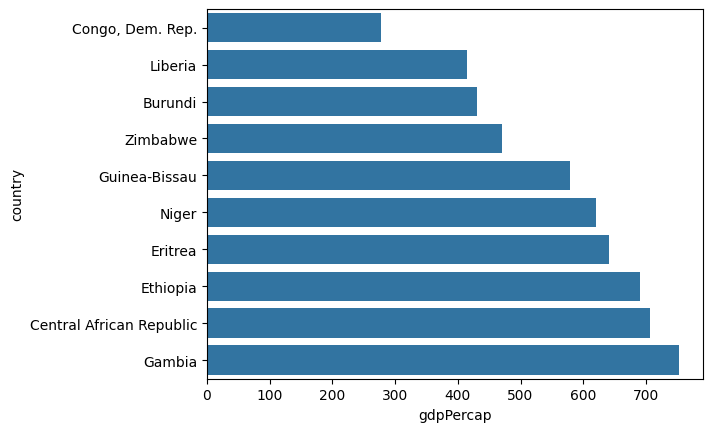

In [55]:
sns.barplot(data=gdp_bottom10, x='gdpPercap', y='country')
plt.show()

## 한국, 중국, 일본의 1인당 GDP 변화

In [61]:
# cjk_df = df[(df.country == 'China') | (df.country == 'Japan') | (df.country == 'Korea, Rep.')]

cjk = ['China', 'Japan', 'Korea, Rep.']
cjk_df = df[df.country.isin(cjk)]
cjk_df

,country,continent,year,lifeExp,pop,gdpPercap
288,China,Asia,1952,44.00000,556263527,400.448611
289,China,Asia,1957,50.54896,637408000,575.987001
290,China,Asia,1962,44.50136,665770000,487.674018
291,China,Asia,1967,58.38112,754550000,612.705693
292,China,Asia,1972,63.11888,862030000,676.900092
293,China,Asia,1977,63.96736,943455000,741.237470
294,China,Asia,1982,65.52500,1000281000,962.421381
295,China,Asia,1987,67.27400,1084035000,1378.904018
296,China,Asia,1992,68.69000,1164970000,1655.784158
297,China,Asia,1997,70.42600,1230075000,2289.234136


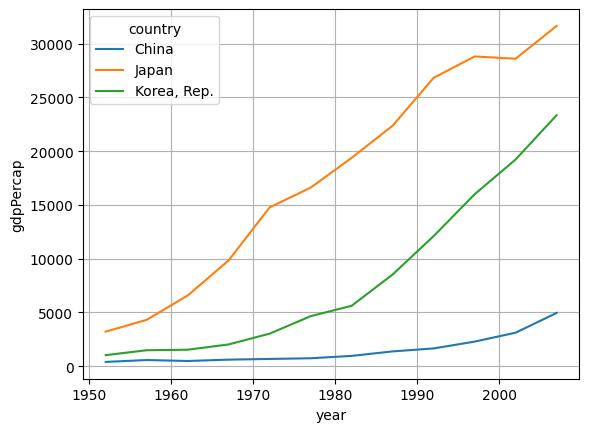

In [62]:
sns.lineplot(data=cjk_df, x='year', y='gdpPercap', hue='country')
plt.grid()
plt.show()

# 인구 분석

In [67]:
df[df['pop'] == df['pop'].max()]   # 인구가 최대인 행

,country,continent,year,lifeExp,pop,gdpPercap
299,China,Asia,2007,72.961,1318683096,4959.114854


In [68]:
df[df['pop'] == df['pop'].min()]  # 인구가 최소인 행

,country,continent,year,lifeExp,pop,gdpPercap
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.583586


## 대륙별 인구 변화

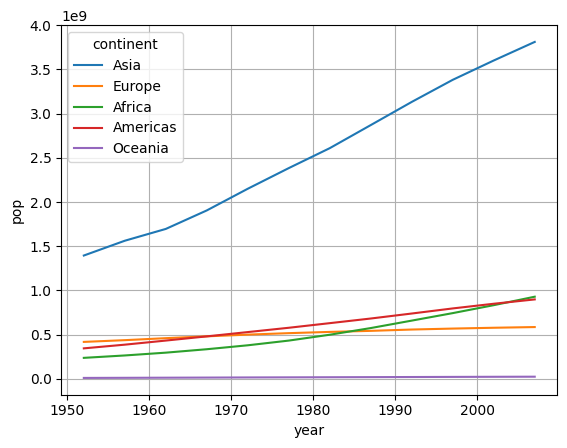

In [71]:
sns.lineplot(data=df, x='year', y='pop', hue='continent', errorbar=None, estimator='sum')
plt.grid()
plt.show()

In [75]:
df.groupby(by=['continent', 'year']).pop.sum()

continent  year
Africa     1952     237640501
           1957     264837738
           1962     296516865
           1967     335289489
           1972     379879541
           1977     433061021
           1982     499348587
           1987     574834110
           1992     659081517
           1997     743832984
           2002     833723916
           2007     929539692
Americas   1952     345152446
           1957     386953916
           1962     433270254
           1967     480746623
           1972     529384210
           1977     578067699
           1982     630290920
           1987     682753971
           1992     739274104
           1997     796900410
           2002     849772762
           2007     898871184
Asia       1952    1395357351
           1957    1562780599
           1962    1696357182
           1967    1905662900
           1972    2150972248
           1977    2384513556
           1982    2610135582
           1987    2871220762
           1992    3133292191
           1997    3383285500
           2002    3601802203
           2007    3811953827
Europe     1952     418120846
           1957     437890351
           1962     460355155
           1967     481178958
           1972     500635059
           1977     517164531
           1982     531266901
           1987     543094160
           1992     558142797
           1997     568944148
           2002     578223869
           2007     586098529
Oceania    1952      10686006
           1957      11941976
           1962      13283518
           1967      14600414
           1972      16106100
           1977      17239000
           1982      18394850
           1987      19574415
           1992      20919651
           1997      22241430
           2002      23454829
           2007      24549947
Name: pop, dtype: int64

아시아 대륙을 제외한 4개 대륙의 인구 변화

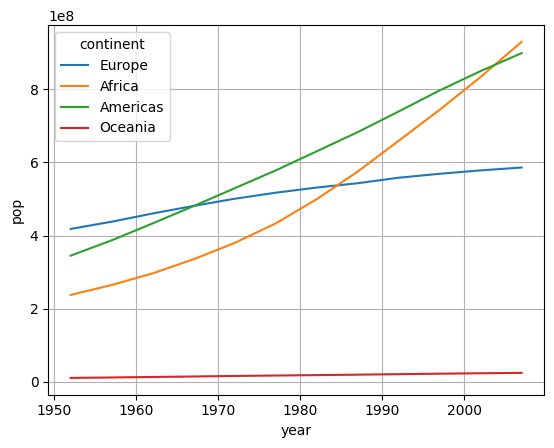

In [74]:
sns.lineplot(data=df[df.continent != 'Asia'], x='year', y='pop', hue='continent',
             estimator='sum', errorbar=None)
plt.grid()
plt.show()